<a href="https://colab.research.google.com/github/Rashmi365/AdminLTE/blob/master/carprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

In [26]:
df=pd.read_csv('/content/car_price_prediction.csv')

In [27]:
 # Display the first 5 rows of the dataset with a gradient color scheme
 df.head().style.background_gradient(cmap='coolwarm', axis=0)


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.300000,Petrol,Manual,114832,New,26613.920000,Model X
1,2,BMW,2018,4.400000,Electric,Manual,143190,Used,14679.610000,5 Series
2,3,Audi,2013,4.500000,Electric,Manual,181601,New,44402.610000,A4
3,4,Tesla,2011,4.100000,Diesel,Automatic,68682,New,86374.330000,Model Y
4,5,Ford,2009,2.600000,Diesel,Manual,223009,Like New,73577.100000,Mustang


In [28]:
df.shape

(2500, 10)

In [29]:
print(df['Brand'].unique())
print(df['Fuel Type'].unique())
print(df['Transmission'].unique())
print(df['Condition'].unique())

['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']
['Petrol' 'Electric' 'Diesel' 'Hybrid']
['Manual' 'Automatic']
['New' 'Used' 'Like New']


In [30]:
df.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


In [31]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


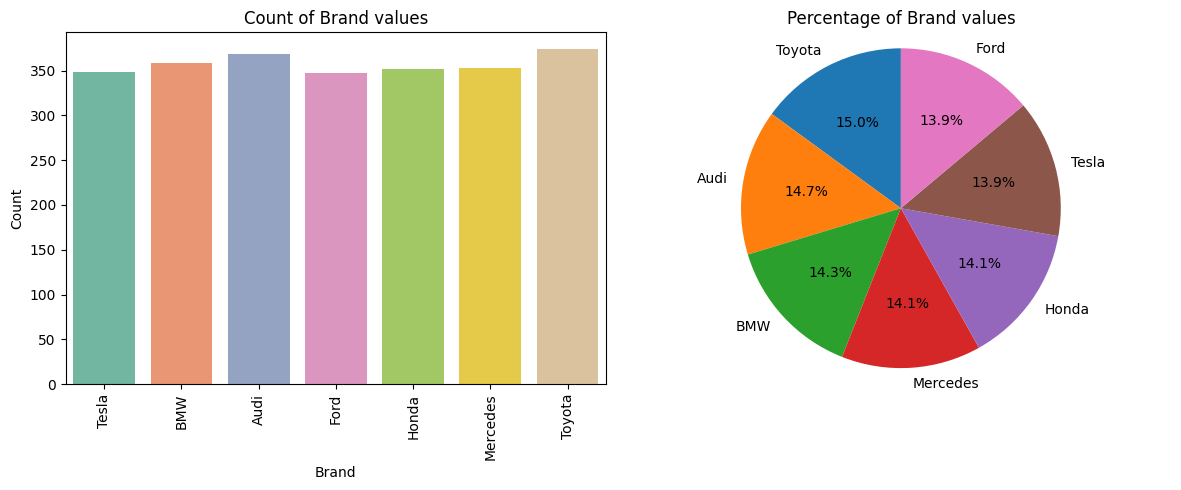

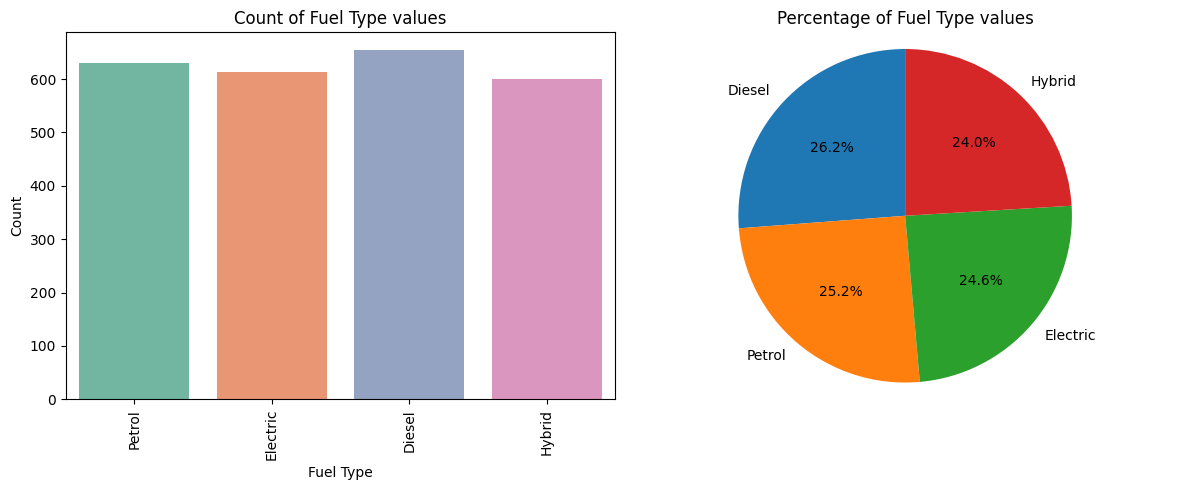

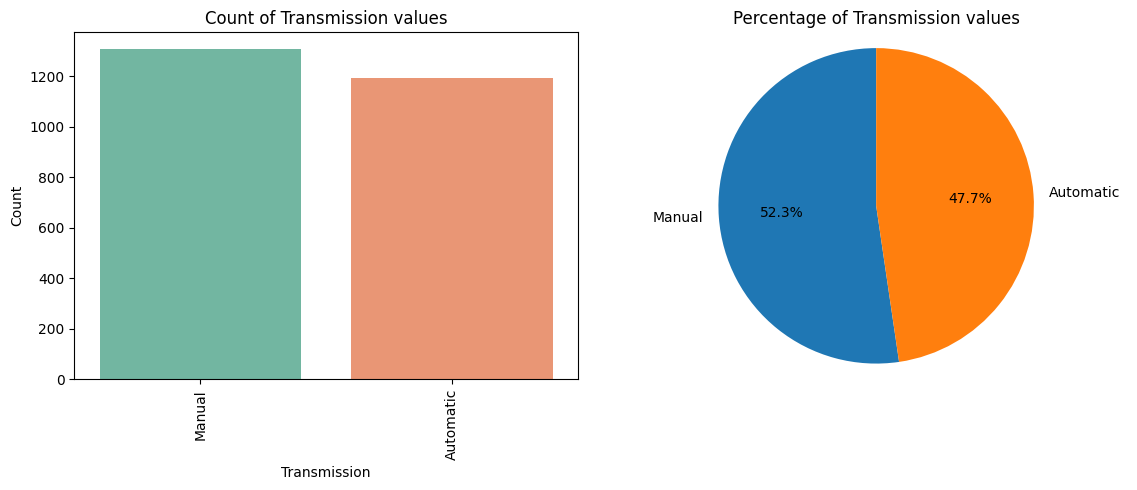

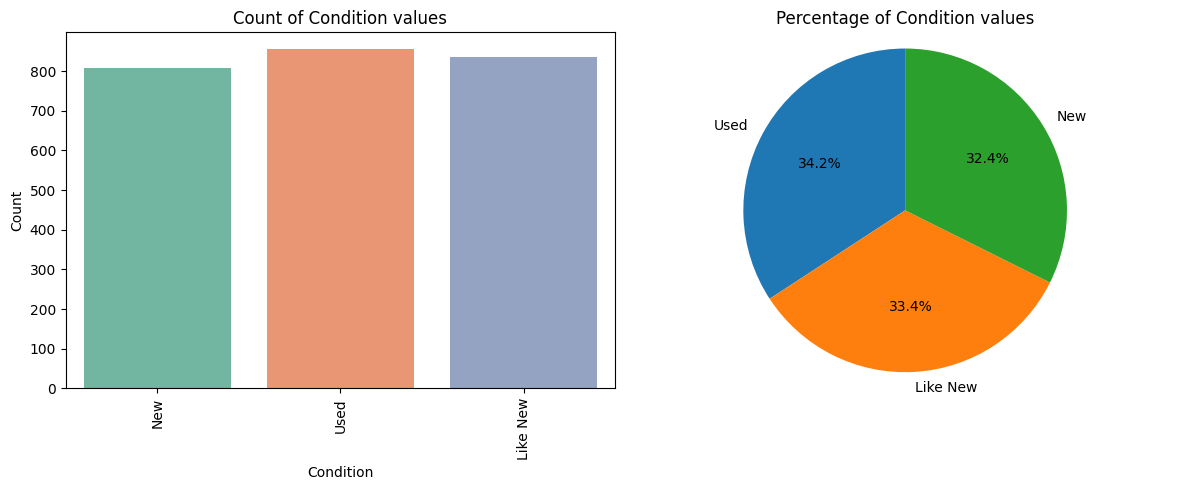

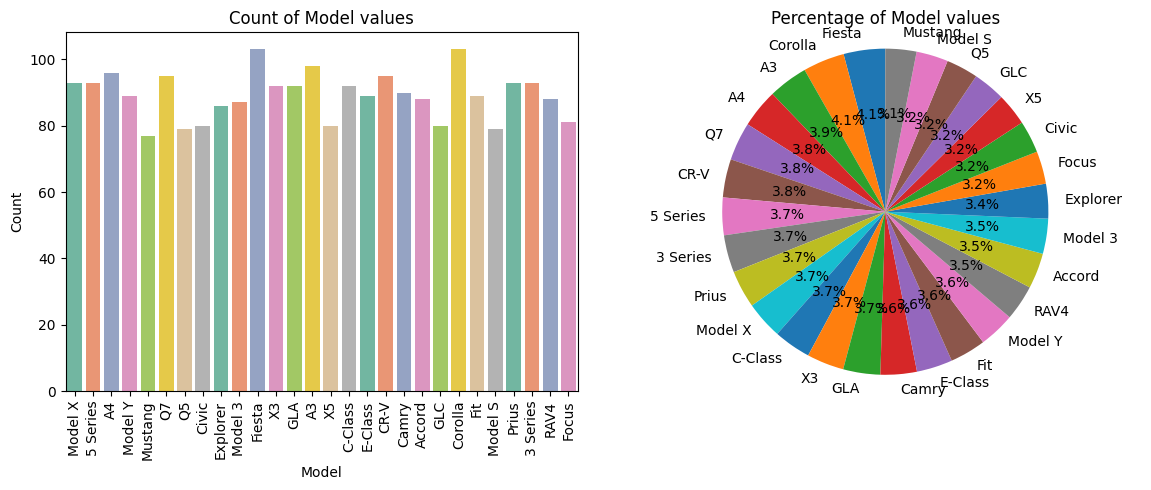

In [32]:
catgorical_values = df.select_dtypes(include=["object"])

for catgorical in catgorical_values:
    counts = df[catgorical].value_counts()
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = catgorical, palette = "Set2")
    plt.title(f"Count of {catgorical} values")
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
    # plt.show()

    plt.subplot(1,2,2)
    # plt.figure(figsize = (12,5))
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=90)
    plt.title(f"Percentage of {catgorical} values")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()
    print("\n")

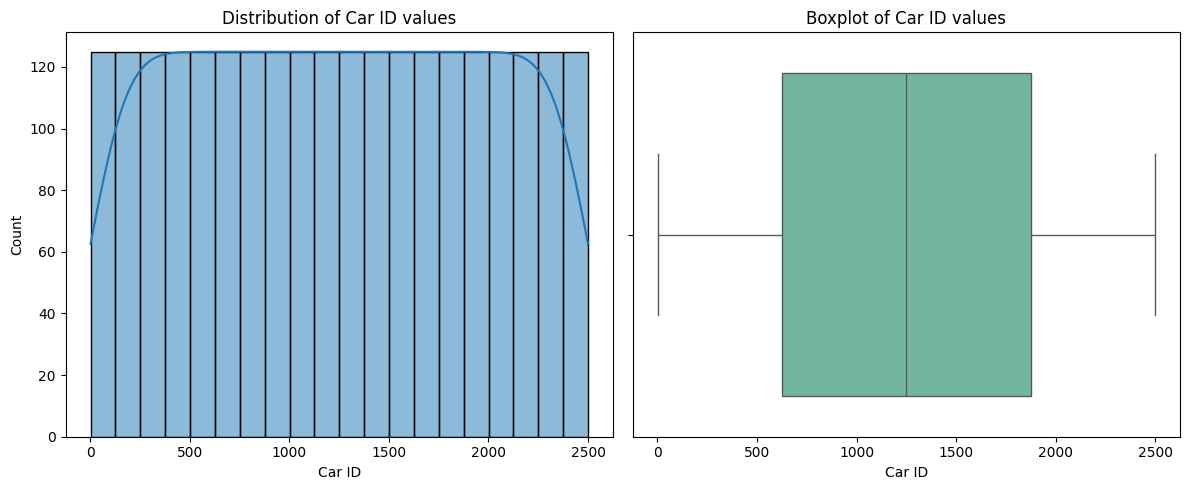

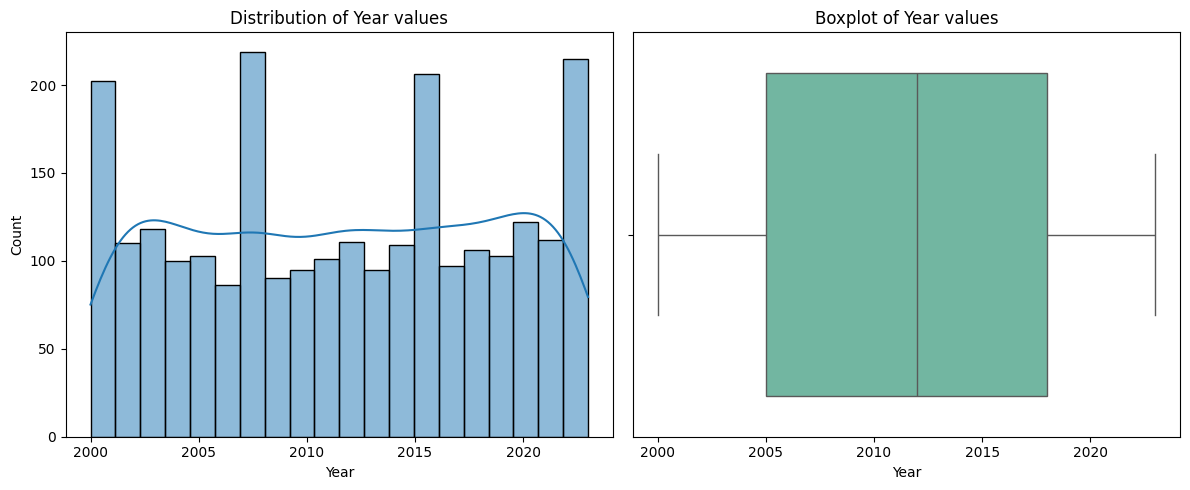

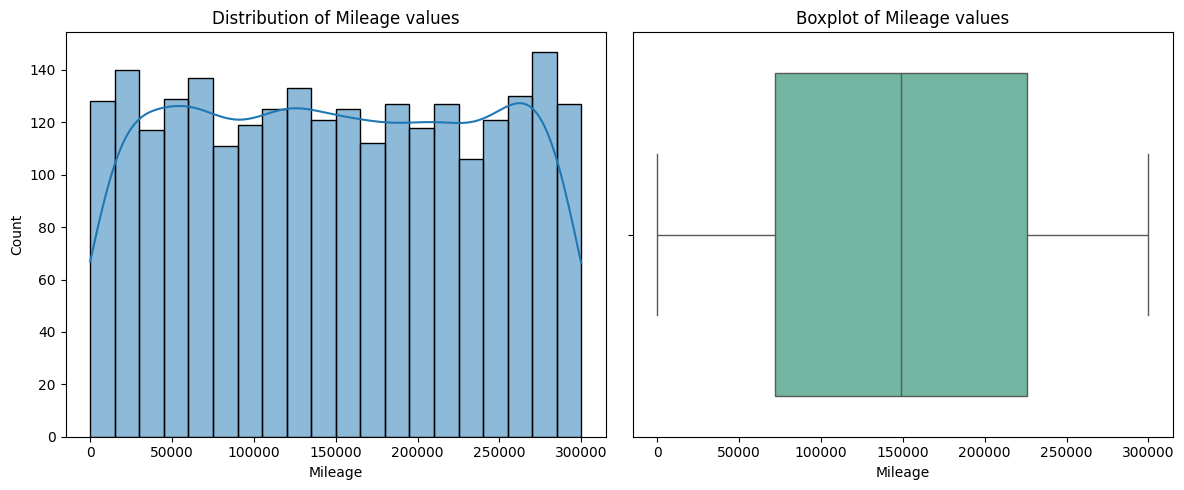

In [33]:
num_values = df.select_dtypes(include = ["int64"])
for num in num_values:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df,x = num,kde = True,palette = "Set2",bins=20)
    plt.title(f"Distribution of {num} values")
    plt.xlabel(num)
    plt.ylabel("Count")
    # plt.show()

    plt.subplot(1,2,2)
    sns.boxplot(data = df,x = num,palette = "Set2")
    plt.title(f"Boxplot of {num} values")
    plt.xlabel(num)
    # plt.show()
    plt.tight_layout()
    plt.show()

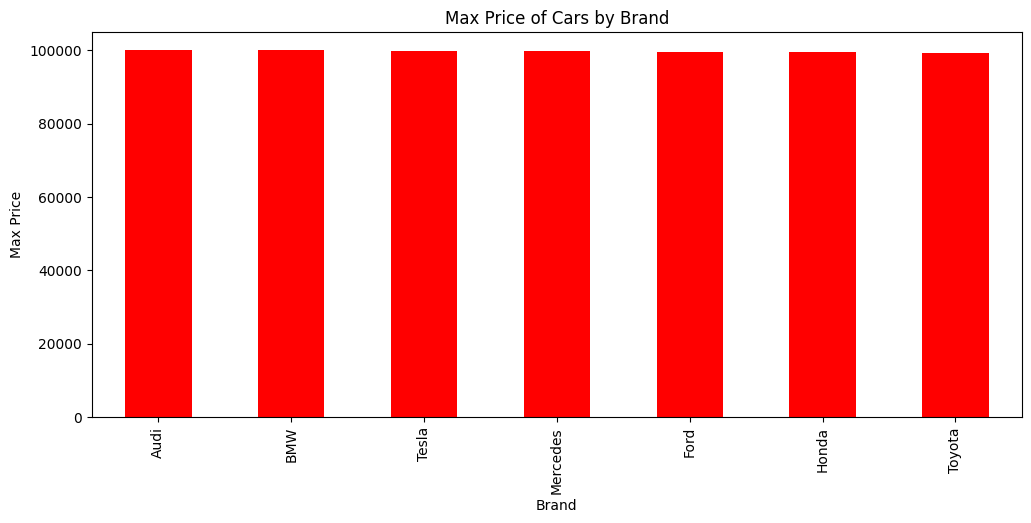

In [34]:
# Group the data by "Brand" and calculate the mean price, then sort in descending order and plot as a bar chart
df.groupby("Brand")["Price"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5), color="orange")
plt.title("Average Price of Cars by Brand")
plt.ylabel("Average Price")  # Label for the y-axis
plt.xlabel("Brand")  # Label for the x-axis
plt.xticks(rotation=90)

# Group the data by "Brand" and calculate the max price, then sort in descending order and plot as a bar chart
df.groupby("Brand")["Price"].max().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5), color="red")
plt.title("Max Price of Cars by Brand")
plt.ylabel("Max Price")  # Label for the y-axis
plt.xlabel("Brand")  # Label for the x-axis
plt.xticks(rotation=90)
plt.show()

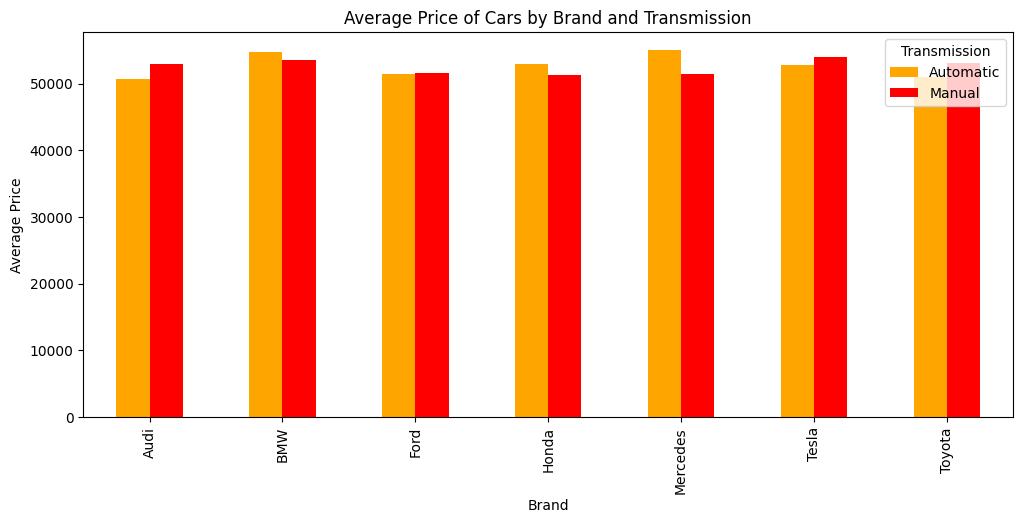

In [35]:
df.groupby(["Transmission","Brand"])["Price"].mean().sort_values(ascending=False).reset_index().pivot(index="Brand",columns="Transmission",values="Price").plot(kind="bar", figsize=(12, 5), color=["orange","red"])
plt.title("Average Price of Cars by Brand and Transmission")
plt.ylabel("Average Price")  # Label for the y-axis
plt.xlabel("Brand")  # Label for the x-axis
plt.xticks(rotation=90)
plt.legend(title="Transmission")
plt.show()

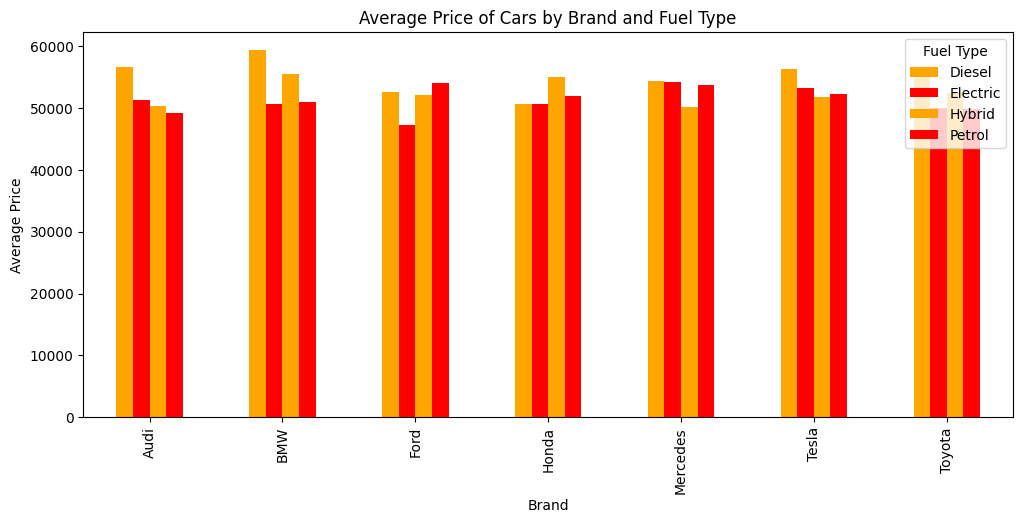

In [36]:
df.groupby(["Fuel Type","Brand"])["Price"].mean().sort_values(ascending=False).reset_index().pivot(index="Brand",columns="Fuel Type",values="Price").plot(kind="bar", figsize=(12, 5), color=["orange","red"])
plt.title("Average Price of Cars by Brand and Fuel Type")
plt.ylabel("Average Price")  # Label for the y-axis
plt.xlabel("Brand")  # Label for the x-axis
plt.xticks(rotation=90)
plt.legend(title="Fuel Type")
plt.show()

 LinearRegression: RMSE: 27799.87
 DesisionTreeRegressor: RMSE: 37141.65
 RandomFrorestRegressor: RMSE: 28157.93


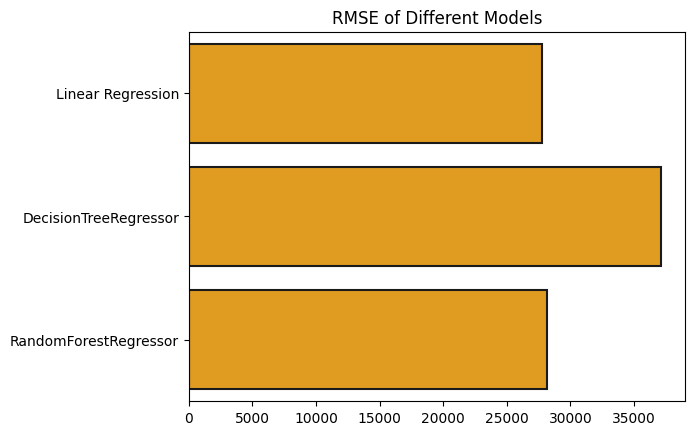

In [37]:
x = df.drop(columns=["Price"])
y = df["Price"]

# split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

numerical_features = x.select_dtypes(include=["int64","float64"]).columns.tolist()
catogorical_features = x.select_dtypes(include=["object"]).columns.tolist()

numerical_transformer = make_pipeline(
    StandardScaler()
)



catogorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', catogorical_transformer, catogorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline for the model
models = [
    ["LinearRegression:",LinearRegression()],
    ['DesisionTreeRegressor:',DecisionTreeRegressor()],
    ["RandomFrorestRegressor:",RandomForestRegressor()]
]

# Evaluate each model
reg_pred = []

for name, model in models:
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(x_train, y_train)
    predictions = pipe.predict(x_test)
    rms = np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(f" {name} RMSE: {rms:.2f}")

y_ax = ["Linear Regression","DecisionTreeRegressor","RandomForestRegressor"]
x_ax = reg_pred

sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1",color="orange")
plt.title("RMSE of Different Models")
plt.show()

 LinearRegression: RMSE: 27799.87
Best parameters for DecisionTreeRegressor:: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_split': 10}
 DecisionTreeRegressor: RMSE: 27559.13
Best parameters for RandomForestRegressor:: {'randomforestregressor__max_depth': 3, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 100}
 RandomForestRegressor: RMSE: 27483.23


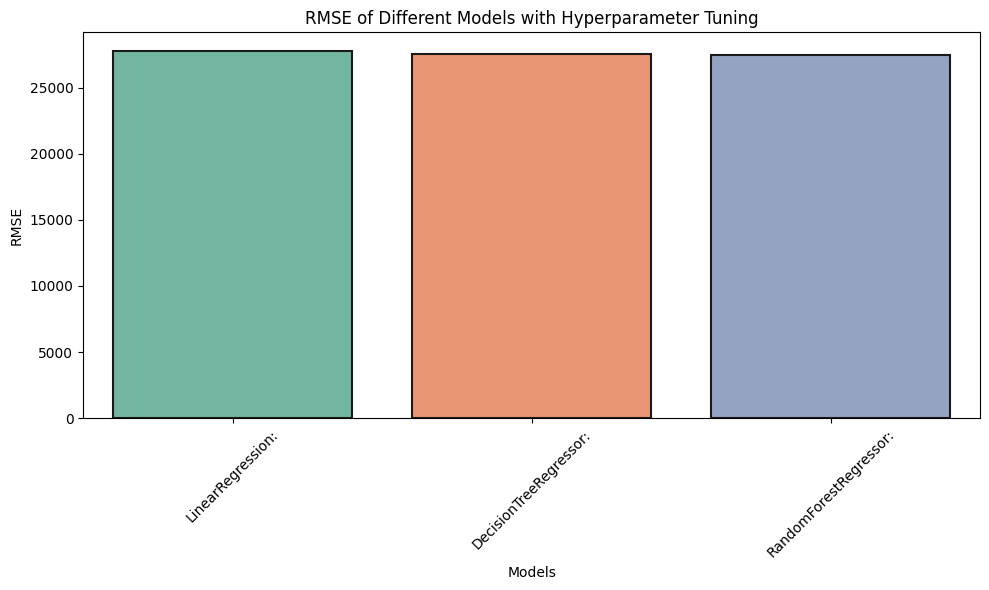

In [38]:
x = df.drop(columns=["Price"])
y = df["Price"]

# split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

numerical_features = x.select_dtypes(include=["int64","float64"]).columns.tolist()
catogorical_features = x.select_dtypes(include=["object"]).columns.tolist()

numerical_transformer = make_pipeline(
    StandardScaler()
)

catogorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', catogorical_transformer, catogorical_features)
    ],
    remainder='passthrough'
)


# Models and Parameter Grids
models_and_params = [
    ("LinearRegression:",LinearRegression(),{}),
    ("DecisionTreeRegressor:",DecisionTreeRegressor(),{
        'decisiontreeregressor__max_depth': [3, 5, 10, None],
        'decisiontreeregressor__min_samples_split': [2, 5, 10]
    }),
    ("RandomForestRegressor:",RandomForestRegressor(),{
        'randomforestregressor__n_estimators': [10, 50, 100],
        'randomforestregressor__max_depth': [3, 5, 10, None],
        'randomforestregressor__min_samples_split': [2, 5, 10]
    })
]

reg_pred = []
model_names = []

for name, model, param_grid in models_and_params:
    pipe = make_pipeline(preprocessor, model)

    # If there are hyperparameters to tune
    if param_grid:
        grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(x_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best parameters for {name}: {grid.best_params_}")
    else:
        best_model = pipe
        best_model.fit(x_train, y_train)
    predictions = best_model.predict(x_test)
    rms = np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    model_names.append(name)
    print(f" {name} RMSE: {rms:.2f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=reg_pred, palette="Set2", linewidth=1.5, edgecolor="0.1")
plt.title("RMSE of Different Models with Hyperparameter Tuning")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()